# Libraries Installation

In [1]:
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install spacy
import nltk
nltk.download('stopwords')
!pip install tweet-preprocessor
!pip install -U textblob
!pip install matplotlib
!pip install seaborn

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maishaanika/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     |████████████████████████████████| 636 kB 861 kB/s            
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


# Spacy Data Download

In [2]:
import sys
!{sys.executable} -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.6 MB 2.1 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Libraries Import

In [3]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import preprocessor as p
from textblob import TextBlob
import string
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Text DataSet Reading

In [4]:
df=pd.read_csv('datasetSentences.txt',sep="\t")

# NLP with Spacy

In [5]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Preporocessing

In [6]:
df['Processed Text'] = df['sentence'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case
df['Processed Text'] = df['Processed Text'].str.replace('[^\w\s]','') # getting rid of special characters
df['Processed Text'] = df['Processed Text'].str.replace('\d+', '') # removing numeric values from between the words
df['Processed Text'] = df['Processed Text'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers

/var/folders/f6/nykdgn515f1gv9y1zjd7yp_40000gn/T/ipykernel_3511/3959125340.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Processed Text'] = df['Processed Text'].str.replace('[^\w\s]','') # getting rid of special characters
/var/folders/f6/nykdgn515f1gv9y1zjd7yp_40000gn/T/ipykernel_3511/3959125340.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Processed Text'] = df['Processed Text'].str.replace('\d+', '') # removing numeric values from between the words


# Stop Words Removal

In [7]:
stop = stopwords.words('english')
df['Processed Text'] = df['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Lemmatization

In [8]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['Processed Text']= df['Processed Text'].apply(space)

# Extra Preprocessing

In [9]:
df['Processed Text']= df['Processed Text'].apply(lambda x: p.clean(x))

# SENTIMENT ANALYSIS

In [10]:
o_s=[]
sentiment=[]
for i in df['Processed Text']:
    blob=TextBlob(str(i)).sentiment.polarity
    o_s.append(blob)
    if blob==0:
        sentiment.append(0)
    elif blob>0 and blob <=0.5:
        sentiment.append(1)
    elif blob>0.5:
        sentiment.append(2)
    elif blob >=-0.5:
        sentiment.append(-1)
    else:
        sentiment.append(-2)

# New DataFrame

In [11]:
df2=pd.DataFrame()
df2['Processed Text']=df['Processed Text']
df2['Original Scores']= o_s
df2['Class']= sentiment

# Saving the File

In [12]:
df2.to_csv('datasetSentences.csv',index=False)

# Reading the File and Setting X, y

In [13]:
df=pd.read_csv('datasetSentences.csv',dtype=str)
X=df['Processed Text'].fillna('0')
y=df['Class']

# Class Distribution Review

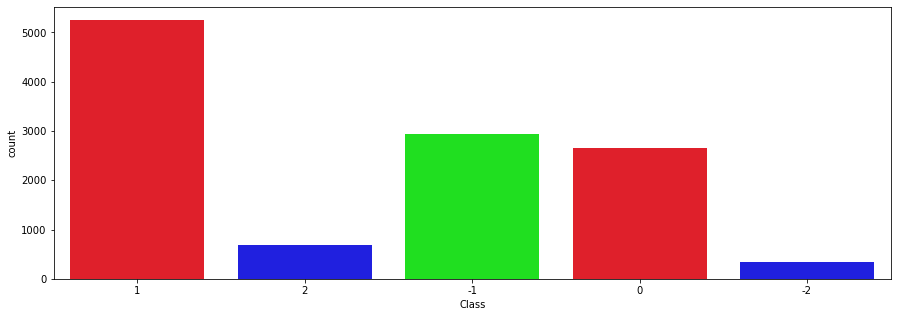

In [14]:
# visualize the distribution of review in graph form
plt.figure(figsize = (15,5))
sns.countplot(x = 'Class', data = df, palette=['#FF000F','#0000FF','#00FF00'])
plt.show()

# Data Spliting

In [15]:
x_train, x_test, y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# TfidfVectorizer for Features Extraction

In [16]:
vectorizer = TfidfVectorizer(lowercase = False)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Random Forest Classifier

In [17]:
s=RandomForestClassifier()
s.fit(x_train, y_train)
y_pred = s.predict(x_test)
r1=accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.52      0.62       594
          -2       0.79      0.35      0.48        78
           0       0.64      0.92      0.75       520
           1       0.74      0.81      0.78      1058
           2       0.58      0.21      0.31       121

    accuracy                           0.72      2371
   macro avg       0.71      0.56      0.59      2371
weighted avg       0.73      0.72      0.70      2371

[[307   6 101 179   1]
 [ 24  27  22   5   0]
 [  3   0 478  39   0]
 [ 55   1 124 860  18]
 [  0   0  23  72  26]]


# Logistic Regression Classifier

In [18]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
l1=accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.57      0.64       594
          -2       0.62      0.06      0.12        78
           0       0.71      0.61      0.66       520
           1       0.68      0.91      0.78      1058
           2       0.67      0.10      0.17       121

    accuracy                           0.69      2371
   macro avg       0.68      0.45      0.47      2371
weighted avg       0.69      0.69      0.66      2371

[[336   2  61 195   0]
 [ 53   5  15   5   0]
 [ 36   0 318 166   0]
 [ 38   1  46 967   6]
 [  1   0  10  98  12]]


/Users/maishaanika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNeighbours Classifier

In [19]:
s=KNeighborsClassifier()
s.fit(x_train, y_train)
y_pred = s.predict(x_test)
k1=accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.50      0.00      0.01       594
          -2       0.75      0.08      0.14        78
           0       0.22      0.99      0.36       520
           1       0.67      0.00      0.01      1058
           2       0.67      0.02      0.03       121

    accuracy                           0.22      2371
   macro avg       0.56      0.22      0.11      2371
weighted avg       0.53      0.22      0.09      2371

[[   2    1  591    0    0]
 [   0    6   72    0    0]
 [   2    0  515    2    1]
 [   0    1 1053    4    0]
 [   0    0  119    0    2]]


# Model Accuracy Graphs

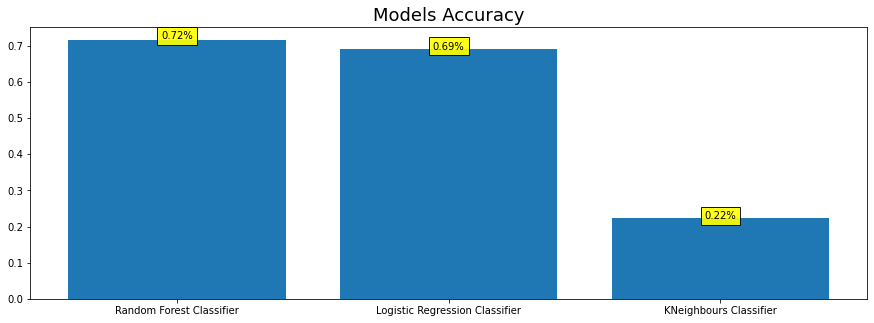

In [20]:
models_acc = [r1,l1,k1]
models_names = ['Random Forest Classifier','Logistic Regression Classifier','KNeighbours Classifier']
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
  for i in range(len(names)):
    plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()